# THU THẬP DỮ LIỆU

Nguồn thu thập dữ liệu : https://tiki.vn/
Dữ liệu sau khi thu thập được từ file json sẽ được đổ vào file csv. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB

df=pd.read_csv('full_tiki.csv')
df['index'] = range(0, len(df))
df.set_index(['index'])
df.head()

,Name,Category,List-Price,Price,Total Review,Rating Average,Discount,Discount Rate,index
0,Nước Xả Vải Comfort Cho Da Nhạy Cảm (3.2L/Túi)...,Chăm sóc nhà cửa,209000,168000,1777,4.7,41000,20,0
1,Túi Nước Giặt Omo Matic Bền Đẹp Cửa Trước 3.7Kg,Chăm sóc nhà cửa,199000,150000,32,5.0,49000,25,1
2,Túi Nước Giặt OMO Matic Comfort Hương Tinh dầu...,Chăm sóc nhà cửa,199000,161000,26,5.0,38000,19,2
3,Nước Giặt Ariel Hương Downy Túi 3.2Kg,Chăm sóc nhà cửa,186000,149000,224,4.8,37000,20,3
4,Combo 2 Túi Nước Giặt Omo Matic Bền Đẹp Cửa Tr...,Chăm sóc nhà cửa,254000,203000,255,4.8,51000,20,4


In [2]:
len(df)  # số mẫu 

1625

In [3]:
df.columns # thông tin các cột

Index(['Name', 'Category', 'List-Price', 'Price', 'Total Review',
       'Rating Average', 'Discount', 'Discount Rate', 'index'],
      dtype='object')

In [4]:
df['Category'].value_counts()

Thực phẩm                     222
Đồ dùng nhà bếp               208
Làm Đẹp - Sức Khỏe            174
Máy Ảnh - Máy Quay Phim       173
Sách                          172
Chăm sóc thú cưng             172
Thiết Bị Số - Phụ Kiện Số     172
Điện Thoại - Máy Tính Bảng    167
Chăm sóc nhà cửa              165
Name: Category, dtype: int64

## Có 9 loại sản phẩm được ưa chuộng 

In [5]:
df['Price'].isnull().sum() 

0

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Thực phẩm'),
  Text(1, 0, 'Đồ dùng nhà bếp'),
  Text(2, 0, 'Làm Đẹp - Sức Khỏe'),
  Text(3, 0, 'Máy Ảnh - Máy Quay Phim'),
  Text(4, 0, 'Sách'),
  Text(5, 0, 'Chăm sóc thú cưng'),
  Text(6, 0, 'Thiết Bị Số - Phụ Kiện Số'),
  Text(7, 0, 'Điện Thoại - Máy Tính Bảng'),
  Text(8, 0, 'Chăm sóc nhà cửa')])

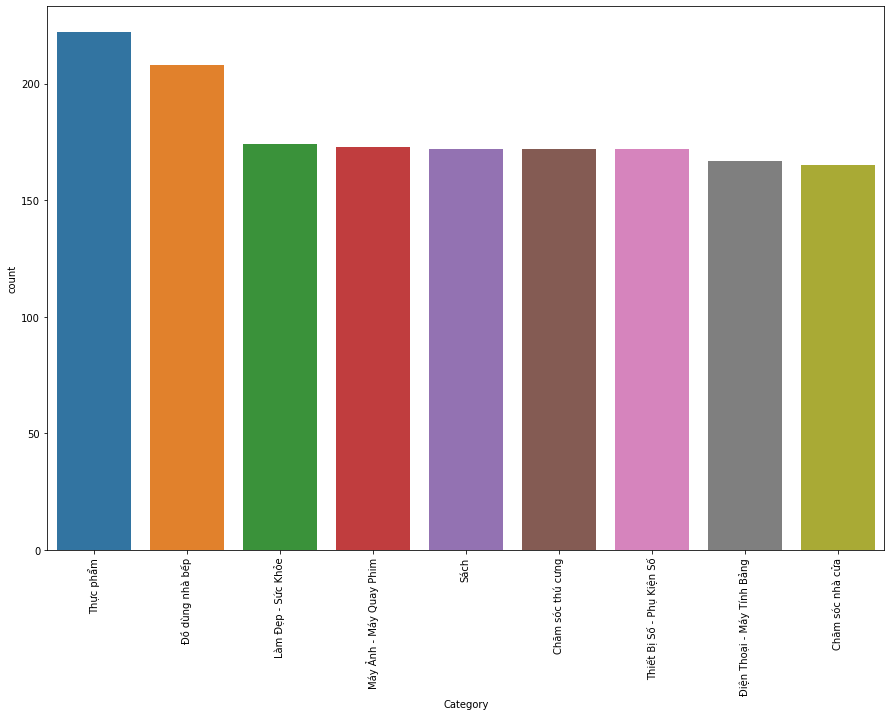

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(x='Category', data=df, order = df['Category'].value_counts().index )
plt.xticks(rotation=90)

In [7]:
df.corr(method ='kendall')

,List-Price,Price,Total Review,Rating Average,Discount,Discount Rate,index
List-Price,1.000000,0.830410,-0.171716,-0.072046,0.685945,0.033058,-0.290893
Price,0.830410,1.000000,-0.158327,-0.020350,0.512492,-0.140571,-0.312651
Total Review,-0.171716,-0.158327,1.000000,0.162349,-0.128337,0.013842,-0.014786
Rating Average,-0.072046,-0.020350,0.162349,1.000000,-0.116381,-0.165514,-0.068692
Discount,0.685945,0.512492,-0.128337,-0.116381,1.000000,0.351140,-0.203343
Discount Rate,0.033058,-0.140571,0.013842,-0.165514,0.351140,1.000000,0.128391
index,-0.290893,-0.312651,-0.014786,-0.068692,-0.203343,0.128391,1.000000


# TRÍCH XUẤT ĐẶC TRƯNG

## TRỰC QUAN HÓA DỮ LIỆU

In [8]:
max(df['Price'])

36990000

In [9]:
min(df['Price'])

5999

<AxesSubplot:>

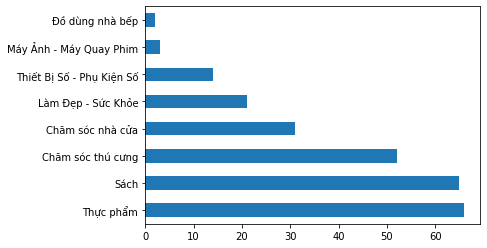

In [10]:
data = df.copy()
data_100nghin = data.loc[data['List-Price'] <= 100000]
data_100nghin['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

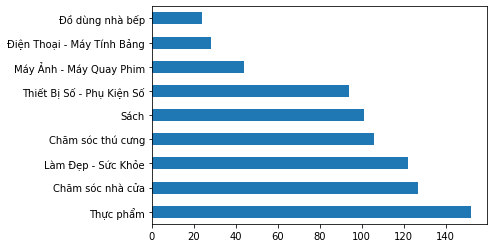

In [11]:
data_500nghin = data.loc[ (100000 < data['List-Price']) & ( data['List-Price'] <= 500000 )]
data_500nghin['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

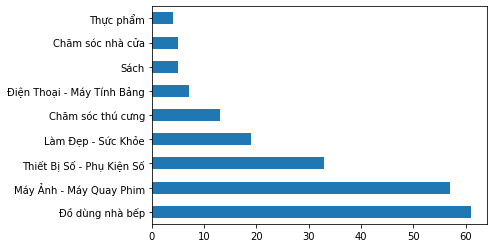

In [12]:
data_1trieu = data.loc[ (500000 < data['List-Price']) & ( data['List-Price'] <= 1000000 )]
data_1trieu['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

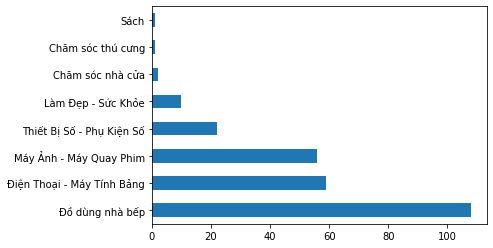

In [13]:
data_5trieu = data.loc[ (1000000 < data['List-Price']) & ( data['List-Price'] <= 5000000 )]
data_5trieu['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

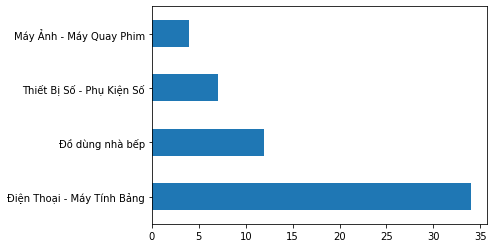

In [14]:
data_10trieu = data.loc[ (5000000 < data['List-Price']) & ( data['List-Price'] <= 10000000 )]
data_10trieu['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

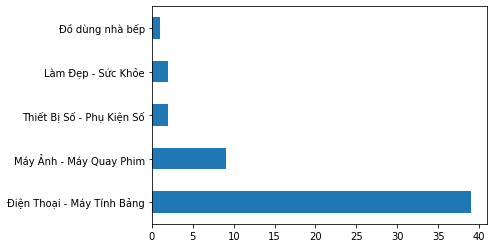

In [15]:
data_L10trieu = data.loc[ (10000000 < data['List-Price'])]
data_L10trieu['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

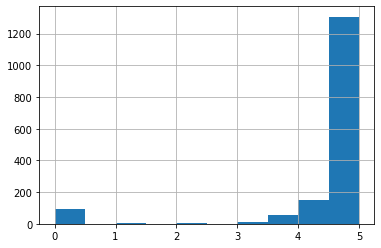

In [16]:
df['Rating Average'].hist()

<AxesSubplot:>

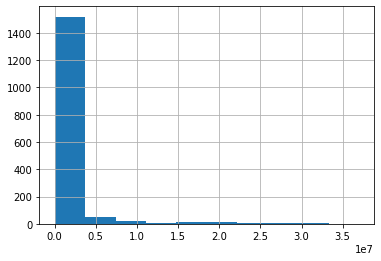

In [17]:
df['Price'].hist()

In [18]:
pd.pivot_table(df, index = 'Category', values = 'Price') # tính mức giá trung bình của từng loại sản phẩm 

,Price
Category,
Chăm sóc nhà cửa,1.632933e+05
Chăm sóc thú cưng,1.432579e+05
Làm Đẹp - Sức Khỏe,6.295395e+05
Máy Ảnh - Máy Quay Phim,1.396833e+06
Sách,1.254558e+05
Thiết Bị Số - Phụ Kiện Số,6.432226e+05
Thực phẩm,1.168476e+05
Điện Thoại - Máy Tính Bảng,6.653945e+06
Đồ dùng nhà bếp,1.219789e+06


In [19]:
# pd.options.display.max_rows
# pd.set_option('display.max_rows', None) # cho phép hiển thị tất cả các dòng
pd.options.mode.chained_assignment = None  # default='warn' 

## Trực quan hóa dữ liệu TRƯỚC khi xử lý ngoại lệ

<AxesSubplot:>

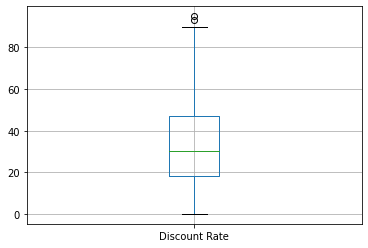

In [20]:
df.boxplot(column="Discount Rate")

<AxesSubplot:>

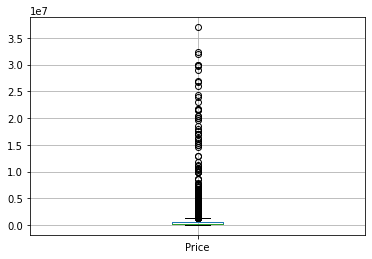

In [21]:
df.boxplot(column="Price")

<AxesSubplot:>

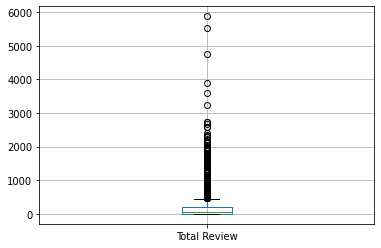

In [22]:
df.boxplot(column="Total Review")

### Nhận xét : 
Thông qua 3 hình vẽ trên ta thấy được rằng Discount Rate có phân bố chuẩn còn Price và Total Review không có phân bố chuẩn mà phân bố lệch.

Dựa vào kết quả thấy được ta áp dụng xử lý Ngoại lệ 

## Xử lý ngoại lệ

### Function Solving Outliers

In [23]:
data = df.copy()

In [24]:
def SolvingOutliers(data, choice = 0) :
    '''
    Hàm xử lý ngoại lệ
    '''
    if choice == 1 :
        # Xử lý biên cuối
        data.loc[data['Price'] >= 1969000,'Price'] = 1969000
        data.loc[data['Total Review'] >= 734,'Total Review']= 734
        data.loc[data['Discount Rate'] >=33,'Discount Rate']= 33
    elif choice == 2 : 
        # Xử lý biên đầu
        data.loc[data['Price'] <= 10000,'Price'] = 10000
        data.loc[data['Total Review'] <= 10,'Total Review']= 10
        data.loc[data['Discount Rate'] <= 5,'Discount Rate']= 5
    else : 
        return data
    return data

In [25]:
data = SolvingOutliers(data,1) 

## Trực quan hóa dữ liệu SAU khi xử lý ngoại lệ

Text(0, 0.5, 'No of product')

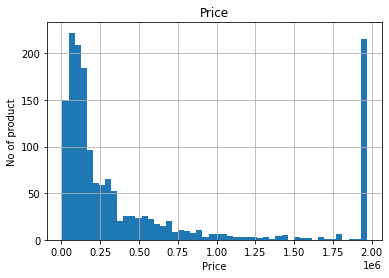

In [26]:
figure=data['Price'].hist(bins=50)
figure.set_title('Price')
figure.set_xlabel('Price')
figure.set_ylabel('No of product')

Text(0, 0.5, 'No of product')

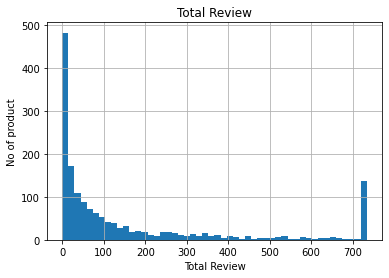

In [27]:
figure=data['Total Review'].hist(bins=50)
figure.set_title('Total Review')
figure.set_xlabel('Total Review')
figure.set_ylabel('No of product')

Text(0, 0.5, 'No of product')

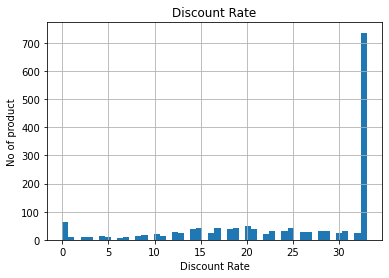

In [28]:
figure=data['Discount Rate'].hist(bins=50)
figure.set_title('Discount Rate')
figure.set_xlabel('Discount Rate')
figure.set_ylabel('No of product')

<AxesSubplot:>

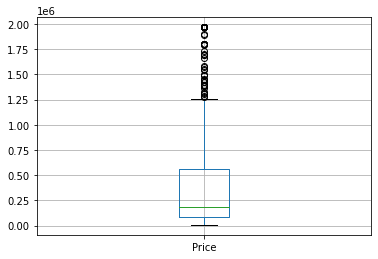

In [29]:
data.boxplot(column="Price")

<AxesSubplot:>

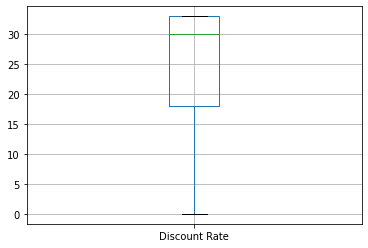

In [30]:
data.boxplot(column="Discount Rate")

<AxesSubplot:>

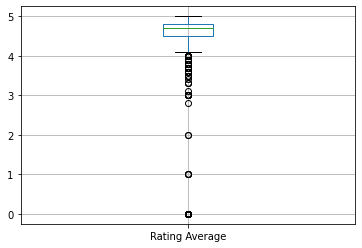

In [31]:
data.boxplot(column = 'Rating Average')

## Classification : Phân lớp cho dữ liệu

In [32]:
def ChangeRawData(data, choice = 1) :
    '''
    Hàm xử lý dữ liệu 
    '''
    if choice == 0 : 
        last_data = data.loc[data['Rating Average'] >= 3]
        
    elif choice == 1 : 
        last_data = data.loc[data['Rating Average'] >= 3]
        last_data.loc[last_data['Rating Average'] < 4 ,'Rating Average']=3
        last_data.loc[ (last_data['Rating Average'] >= 4)
                      & (last_data['Rating Average'] < 4.8 ),'Rating Average']=4   
        last_data.loc[last_data['Rating Average'] >= 4.8 ,'Rating Average']=5
        
    elif choice == 2 : 
        last_data = data.loc[data['Rating Average'] >= 3]
        last_data.loc[last_data['Rating Average'] < 3.4  ,'Rating Average']=3
        last_data.loc[ (last_data['Rating Average'] >= 3.4)
                      & (last_data['Rating Average'] < 3.8 ),'Rating Average']=3.5
        last_data.loc[ (last_data['Rating Average'] >= 3.8)
                      & (last_data['Rating Average'] < 4.4 ),'Rating Average']=4
        last_data.loc[ (last_data['Rating Average'] >= 4.4)
                      & (last_data['Rating Average'] < 4.8 ),'Rating Average']=4.5
        last_data.loc[last_data['Rating Average'] >= 4.8 ,'Rating Average'] = 5


    last_data['Price_log']=np.log1p(last_data['Price'])
    last_data['Review_log']=np.log1p(last_data['Total Review'])
    last_data['New-Rate'] = last_data['Rating Average'].apply(lambda x: x * 10 )
    
    last_data = last_data.reset_index() 
    # reset index để tránh lỗi sklearn error ValueError: Input contains NaN, infinity or a value too large for dtype('float64')
    return last_data

In [33]:
last_data = ChangeRawData(data,2)
last_data['Rating Average'].value_counts()

4.5    743
5.0    564
4.0    182
3.5     24
3.0     12
Name: Rating Average, dtype: int64

## Chuẩn hóa dữ liệu 

In [34]:
def plot_data(df,feature):
    '''
    Hàm vẽ kiểm tra xem đối tượng xem xét có phân bố chuẩn hay không ?
    '''
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist() # histogram
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=plt)# prob plot
    plt.show()

### Trực quan hóa trước khi chuẩn hóa 

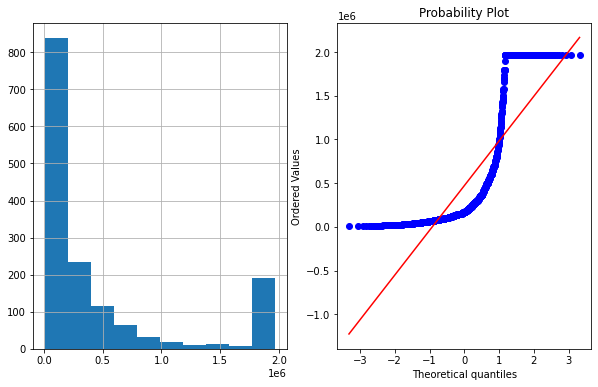

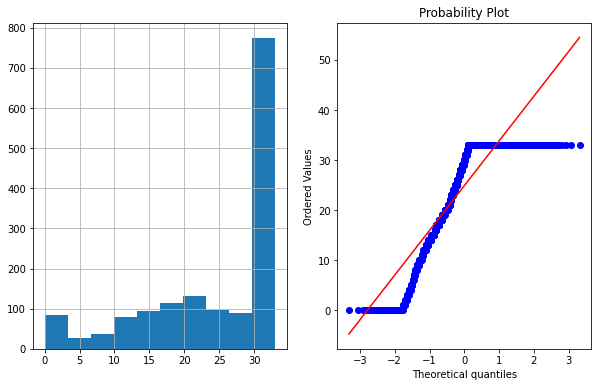

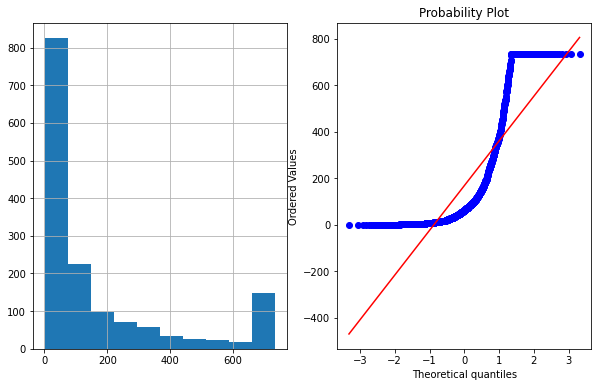

In [35]:
plot_data(last_data,'Price')
plot_data(last_data,'Discount Rate') 
plot_data(last_data,'Total Review')

### Nhận xét : 
Thông qua đồ thị được vẽ ở trên thì ta thấy : 

Price không phân bố chuẩn do đó không thể áp dụng chuẩn hóa Z-Score hoặc chuẩn hóa Min-Max. Áp dụng phương pháp logarit để biến đổi.

Discount Rate phân bố chuẩn áp dụng chuẩn hóa Z-Score hoặc chuẩn hóa Min-Max

Total Review không phân bố chuẩn

Sau khi biết được các giá trị trên có phân bố chuẩn hay không thì tiếp tục áp dụng chuẩn hóa dữ liệu

### Trực quan hóa sau khi chuẩn hóa

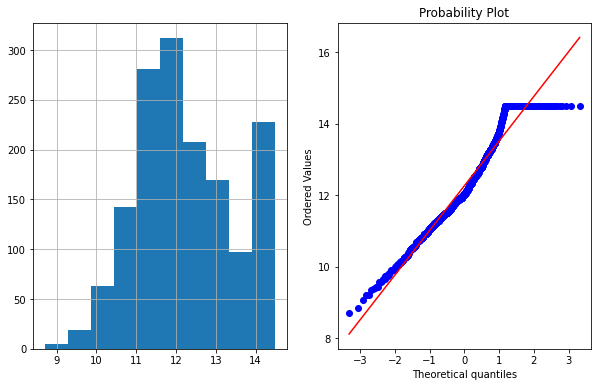

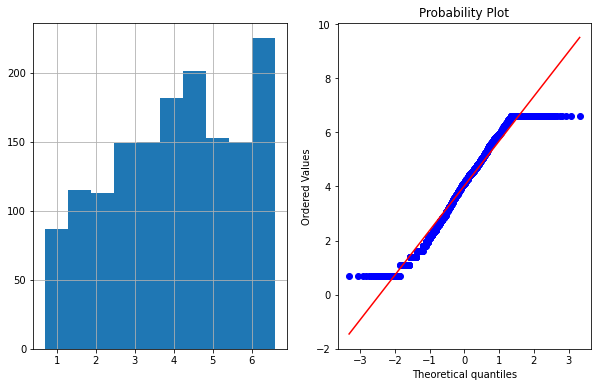

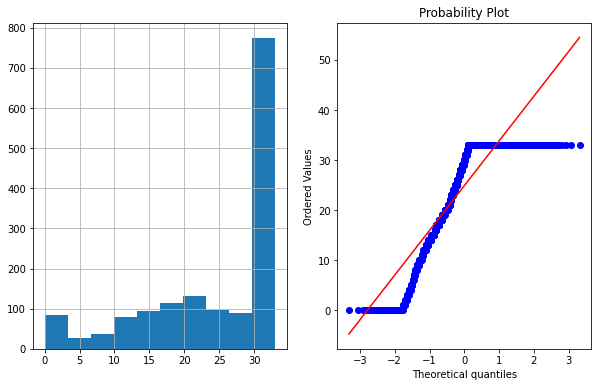

In [36]:
last_data['Price_log']=np.log1p(last_data['Price'])
last_data['Review_log']=np.log1p(last_data['Total Review'])
plot_data(last_data,'Price_log')
plot_data(last_data,'Review_log')
plot_data(last_data,'Discount Rate')

# MÔ HÌNH HÓA DỮ LIỆU

## MÔ HÌNH NAVIE BAYES

## Hàm dự đoán độ chính xác mô hình NAVIE BAYES

In [37]:
def Predict_Score(new_data):
    '''
    Hàm dự đoán sau khi train/test.
    Giá trị trả về của hàm là giá trị trung bình và giá trị max của train/test
    '''
    list_accuracy_score = []
    for i in range(100):
        X_train,X_test,y_train,y_test=train_test_split(new_data[['Price_log','Discount Rate','Review_log','Type-Category']],
                                                       new_data['New-Rate'], 
                                                       test_size=0.2, random_state=i, shuffle = True)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=i)

        gnb = GaussianNB()
        gnb.fit(X_train,y_train)
        y_pred = gnb.predict(X_val) #Predict the response for test dataset
        list_accuracy_score.append(accuracy_score(y_val,y_pred))
    
    plt.figure(figsize=(15,10))
    plt.plot(list_accuracy_score)   
    return np.mean(list_accuracy_score), max(list_accuracy_score) ,min(list_accuracy_score)

# Dán nhãn dữ liệu sử dụng LabeEncoder

In [38]:
LE = LabelEncoder()
df['Type-Category'] = LE.fit_transform(df['Category']) # đánh số cho các loại sản phẩm
data = df.copy()

### Chuẩn hóa Z-Score

In [39]:
data = SolvingOutliers(data,1) 
last_data = ChangeRawData(data,1)
scaler = StandardScaler()
last_data_scaled = scaler.fit_transform(last_data[['Price_log','Discount Rate','Review_log']])

last_data['Price_log'] = last_data_scaled[:,0]  # dữ liệu của Price_logs
last_data['Discount Rate'] = last_data_scaled[:,1]
last_data['Review_log'] = last_data_scaled[:,2]

(0.6219016393442623, 0.6918032786885245, 0.5540983606557377)

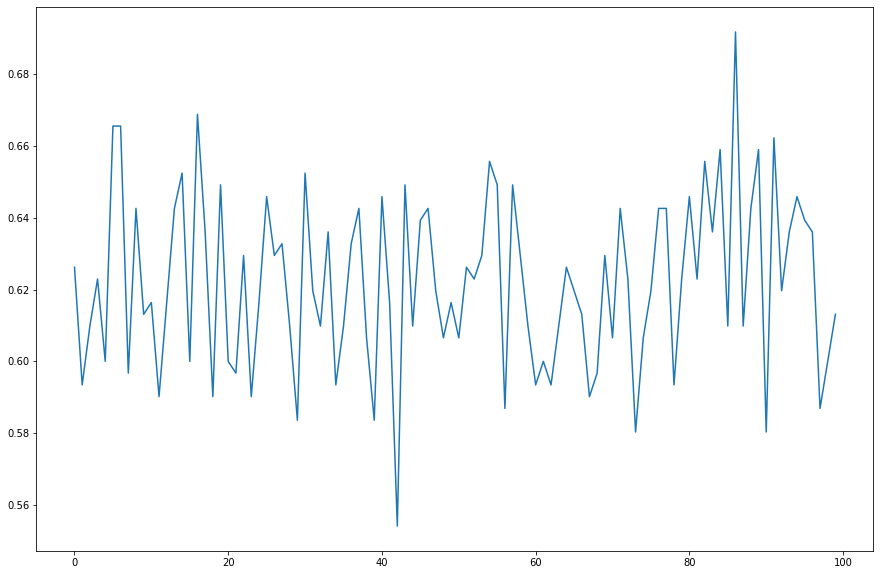

In [40]:
Predict_Score(last_data)

## Chuẩn hóa Min-Max

In [41]:
data = SolvingOutliers(data,1) 
last_data = ChangeRawData(data,1)
min_max=MinMaxScaler()
columns_get = ['Price_log','Discount Rate','Review_log']
last_data_minmax=pd.DataFrame(min_max.fit_transform(last_data[['Price_log','Discount Rate','Review_log']]),columns=columns_get)

last_data['Price_log'] = last_data_minmax['Price_log']
last_data['Discount Rate'] = last_data_minmax['Discount Rate']
last_data['Review_log'] = last_data_minmax['Review_log']

(0.6219016393442623, 0.6918032786885245, 0.5540983606557377)

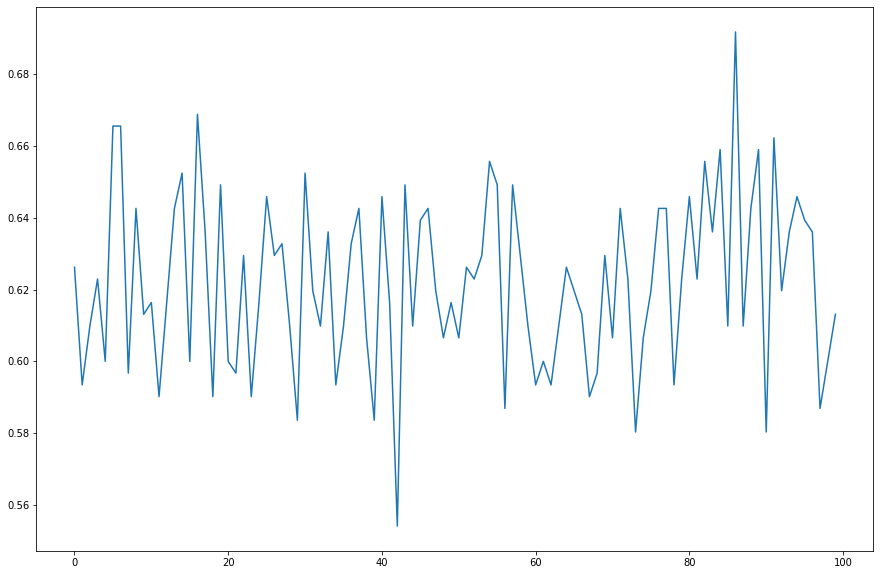

In [42]:
Predict_Score(last_data)

## Chuẩn hóa mạnh với Ngoại Lệ

In [43]:
data = df.copy()
data = SolvingOutliers(data)  # không xử lý ngoại lệ để áp dụng chuẩn hóa 
last_data = ChangeRawData(data,1)
r_scaler=RobustScaler()
last_data_robust_scaler=pd.DataFrame(r_scaler.fit_transform(last_data[['Price_log','Discount Rate','Review_log']]),columns=columns_get)

last_data['Price_log'] = last_data_robust_scaler['Price_log']
last_data['Discount Rate'] = last_data_robust_scaler['Discount Rate']
last_data['Review_log'] = last_data_robust_scaler['Review_log']

(0.6242295081967213, 0.6819672131147541, 0.5639344262295082)

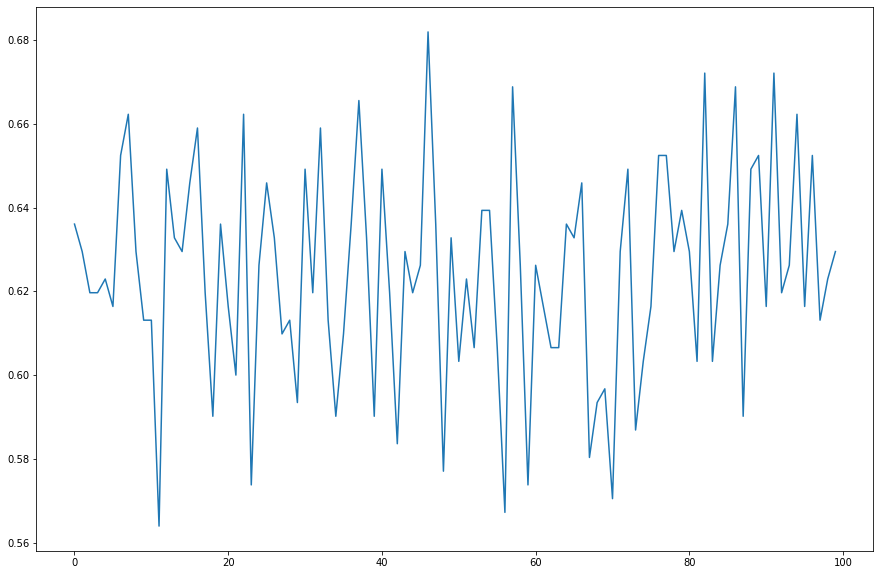

In [44]:
Predict_Score(last_data)

# Dán nhãn dữ liệu sử dụng OneHotEncoder

In [45]:
def OneHotEncoder_Label() :
    data = df.copy()
    enc = OneHotEncoder(handle_unknown='ignore')
    array_drop = ['Type-Category','Name','List-Price','Discount','index']
    data.drop(array_drop,inplace=True, axis=1) # bỏ hết những cột không phải đặc trưng lựa chọn
    enc_df = pd.DataFrame(enc.fit_transform(data[['Category']]).toarray())
    data = data.join(enc_df)
    data.drop('Category',inplace=True, axis=1)
    return data

### Hàm đánh giá độ chính xác 

In [46]:
def Predict_Score_OneHot(new_data):
    '''
    Hàm dự đoán sau khi train/test.
    Giá trị trả về của hàm là giá trị trung bình và giá trị max của train/test
    '''
    list_accuracy_score = []
    rating = new_data.iloc[:,12]
    new_data.drop('New-Rate',inplace=True, axis=1)
    for i in range(100):      
        X_train,X_test,y_train,y_test=train_test_split(new_data,
                                                       rating, 
                                                       test_size=0.2, random_state=i, shuffle = True)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=i)

        gnb = GaussianNB()
        gnb.fit(X_train,y_train)
        y_pred = gnb.predict(X_val) #Predict the response for test dataset
        list_accuracy_score.append(accuracy_score(y_val,y_pred))
    
    plt.figure(figsize=(15,10))
    plt.plot(list_accuracy_score)   
    return np.mean(list_accuracy_score), max(list_accuracy_score) ,min(list_accuracy_score)

## Chuẩn hóa Z-Score

In [47]:
data = OneHotEncoder_Label()
data = SolvingOutliers(data,1)
last_data = ChangeRawData(data,1)
last_data_scaled = scaler.fit_transform(last_data[['Price_log','Discount Rate','Review_log']])

last_data['Price_log'] = last_data_scaled[:,0]  # dữ liệu của Price_logs
last_data['Discount Rate'] = last_data_scaled[:,1]
last_data['Review_log'] = last_data_scaled[:,2]
arr_drop_new = ['Price','Total Review','Rating Average','index']
last_data.drop(arr_drop_new, inplace=True, axis=1)

last_data

,Discount Rate,0,1,2,3,4,5,6,7,8,Price_log,Review_log,New-Rate
0,-0.488335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.185157,1.531189,40.0
1,0.013424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.274326,-0.316386,50.0
2,-0.588687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.218644,-0.435855,50.0
3,-0.488335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.279589,0.826436,50.0
4,-0.488335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.036258,0.903282,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,-0.287631,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.518362,0.122741,40.0
1521,-0.990094,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.477490,-0.393312,50.0
1522,-1.291149,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.088331,-1.439846,50.0
1523,0.816238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.835601,-1.089909,30.0


(0.2581311475409836, 0.4163934426229508, 0.15081967213114755)

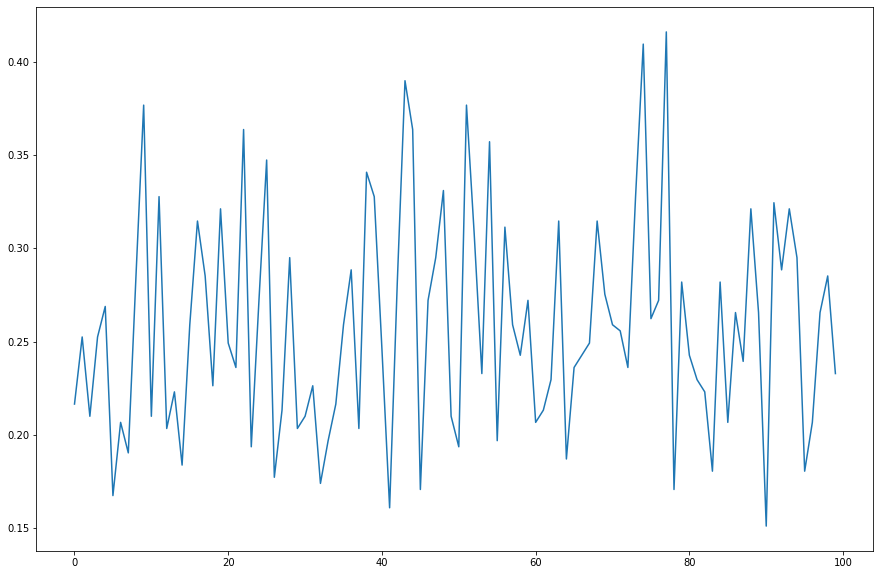

In [48]:
Predict_Score_OneHot(last_data)

## Chuẩn hóa Min - Max

In [49]:
data = OneHotEncoder_Label()
data = SolvingOutliers(data,1) 
last_data = ChangeRawData(data,1)
columns_get = ['Price_log','Discount Rate','Review_log']
last_data_minmax=pd.DataFrame(min_max.fit_transform(last_data[['Price_log','Discount Rate','Review_log']]),columns=columns_get)

last_data['Price_log'] = last_data_minmax['Price_log']
last_data['Discount Rate'] = last_data_minmax['Discount Rate']
last_data['Review_log'] = last_data_minmax['Review_log']
arr_drop_new = ['Price','Total Review','Rating Average','index']
last_data.drop(arr_drop_new, inplace=True, axis=1)

(0.23380327868852457, 0.4163934426229508, 0.14098360655737704)

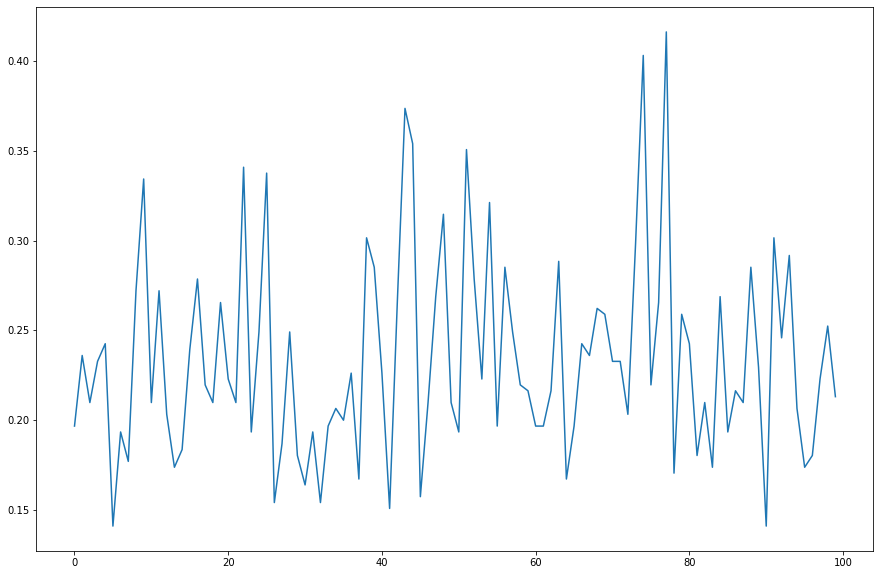

In [50]:
Predict_Score_OneHot(last_data)

## Chuẩn hóa mạnh với ngoại lệ

In [51]:
data = OneHotEncoder_Label()
data = SolvingOutliers(data)  # không xử lý ngoại lệ để áp dụng chuẩn hóa 
last_data = ChangeRawData(data,1)
last_data_robust_scaler=pd.DataFrame(r_scaler.fit_transform(last_data[['Price_log','Discount Rate','Review_log']]),columns=columns_get)

last_data['Price_log'] = last_data_robust_scaler['Price_log']
last_data['Discount Rate'] = last_data_robust_scaler['Discount Rate']
last_data['Review_log'] = last_data_robust_scaler['Review_log']
arr_drop_new = ['Price','Total Review','Rating Average','index']
last_data.drop(arr_drop_new, inplace=True, axis=1)

(0.261639344262295, 0.42950819672131146, 0.1540983606557377)

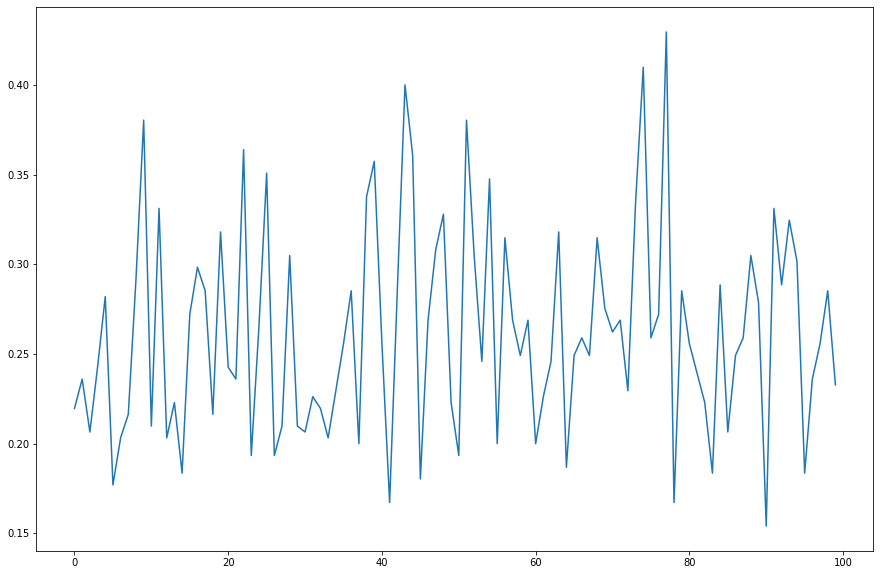

In [52]:
Predict_Score_OneHot(last_data)

### Nhận xét : 


# Mô hình SVM ( Support Vector Machine ) 

In [53]:
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

# Dán nhãn dữ liệu sử dụng LabelEncoder

In [54]:
def Predict_Score_SVM(new_data):
    '''
    Hàm dự đoán sau khi train/test.
    Giá trị trả về của hàm là giá trị trung bình và giá trị max của train/test
    '''
    list_accuracy_score = []
    for i in range(100):
        X_train,X_test,y_train,y_test=train_test_split(new_data[['Price_log','Discount Rate','Review_log','Type-Category']],
                                                       new_data['New-Rate'], 
                                                       test_size=0.2, random_state=i, shuffle = True)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=i)
        svc_model = svm.SVC() #Create a svm Classifier
        svc_model.fit(X_train, y_train) #Train the model using the training sets
        y_pred = svc_model.predict(X_val) #Predict the response for test dataset 
        list_accuracy_score.append(accuracy_score(y_val,y_pred))

    plt.figure(figsize=(15,10))
    plt.plot(list_accuracy_score)   
    return np.mean(list_accuracy_score), max(list_accuracy_score) ,min(list_accuracy_score)

## Chuẩn hóa Z-Score

In [55]:
data = df.copy() 
data = SolvingOutliers(data,1) 
last_data = ChangeRawData(data,1)
last_data_scaled = scaler.fit_transform(last_data[['Price_log','Discount Rate','Review_log']])

last_data['Price_log'] = last_data_scaled[:,0]  # dữ liệu của Price_logs
last_data['Discount Rate'] = last_data_scaled[:,1]
last_data['Review_log'] = last_data_scaled[:,2]

(0.6351475409836066, 0.6950819672131148, 0.5770491803278689)

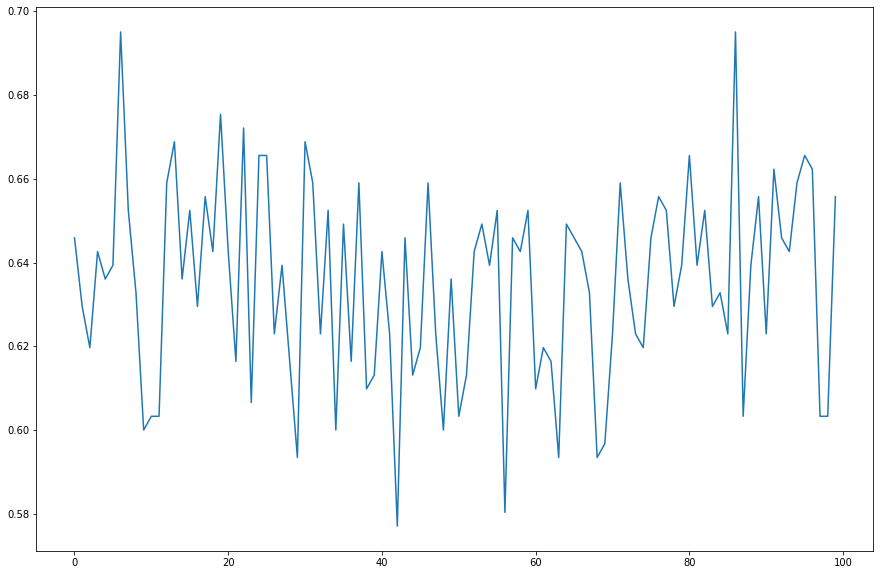

In [56]:
Predict_Score_SVM(last_data)

## Chuẩn hóa Min Max

In [57]:
data = df.copy() 
data = SolvingOutliers(data,1) 
last_data = ChangeRawData(data,1)
min_max=MinMaxScaler()
columns_get = ['Price_log','Discount Rate','Review_log']
last_data_minmax=pd.DataFrame(min_max.fit_transform(last_data[['Price_log','Discount Rate','Review_log']]),columns=columns_get)

last_data['Price_log'] = last_data_minmax['Price_log']
last_data['Discount Rate'] = last_data_minmax['Discount Rate']
last_data['Review_log'] = last_data_minmax['Review_log']

(0.6028852459016394, 0.6786885245901639, 0.5278688524590164)

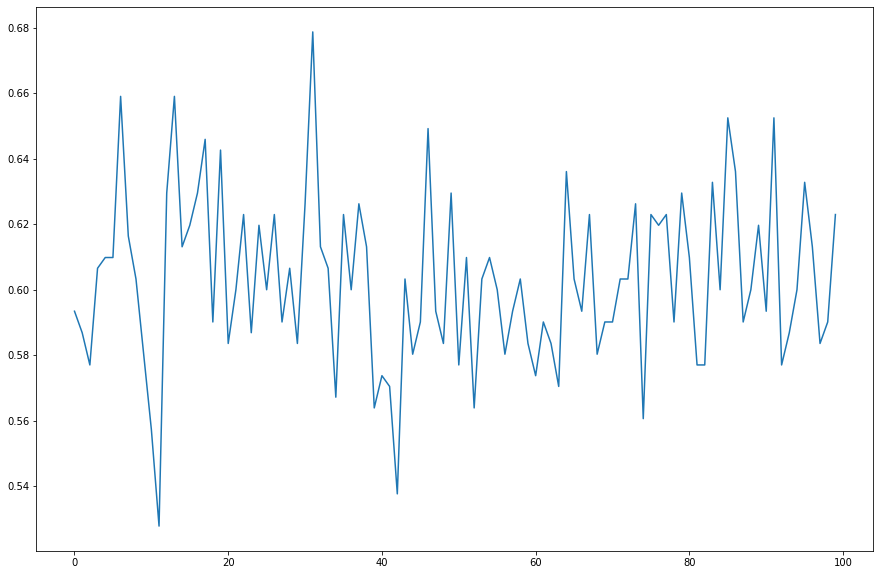

In [58]:
Predict_Score_SVM(last_data)

## Chuẩn hóa mạnh với ngoại lệ 

In [59]:
data = df.copy()
data = SolvingOutliers(data)  # không xử lý ngoại lệ để áp dụng chuẩn hóa 
last_data = ChangeRawData(data,1)
r_scaler=RobustScaler()
last_data_robust_scaler=pd.DataFrame(r_scaler.fit_transform(last_data[['Price_log','Discount Rate','Review_log']]),columns=columns_get)

last_data['Price_log'] = last_data_robust_scaler['Price_log']
last_data['Discount Rate'] = last_data_robust_scaler['Discount Rate']
last_data['Review_log'] = last_data_robust_scaler['Review_log']

(0.6430819672131147, 0.7049180327868853, 0.5934426229508196)

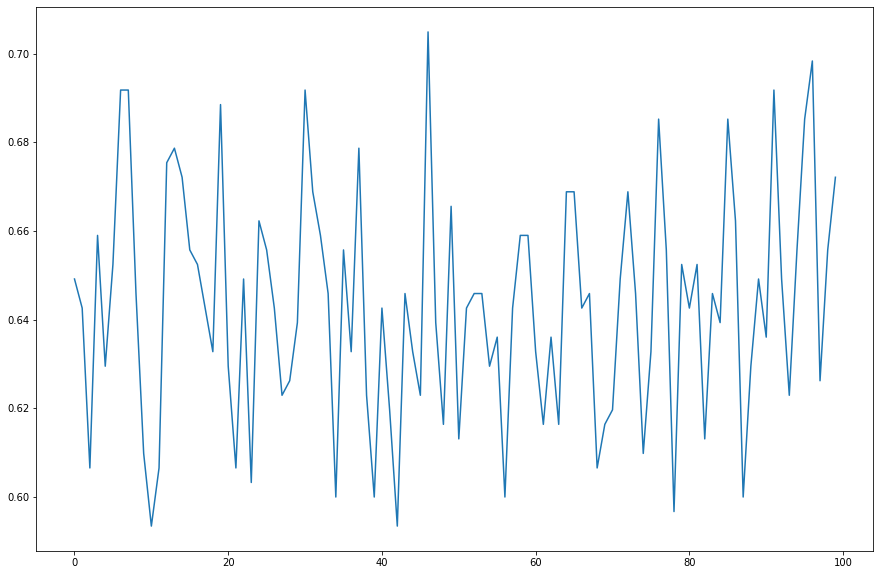

In [60]:
Predict_Score_SVM(last_data)

# Dán nhãn dữ liệu sử dụng OneHotEncoder

In [61]:
def Predict_Score_SVM_OneHotEncoder(new_data):
    '''
    Hàm dự đoán sau khi train/test.
    Giá trị trả về của hàm là giá trị trung bình và giá trị max của train/test
    '''
    list_accuracy_score = []
    rating = new_data.iloc[:,12]
    new_data.drop('New-Rate',inplace=True, axis=1)
    for i in range(100):      
        X_train,X_test,y_train,y_test=train_test_split(new_data,
                                                       rating, 
                                                       test_size=0.2, random_state=i, shuffle = True)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=i)
        svc_model = svm.SVC() #Create a svm Classifier
        svc_model.fit(X_train, y_train) #Train the model using the training sets
        y_pred = svc_model.predict(X_val) #Predict the response for test dataset 
        list_accuracy_score.append(accuracy_score(y_val,y_pred))
    plt.figure(figsize=(15,10))
    plt.plot(list_accuracy_score)   
    return np.mean(list_accuracy_score), max(list_accuracy_score) ,min(list_accuracy_score)

## Chuẩn hóa Z-Score

In [62]:
data = OneHotEncoder_Label()
scaler = StandardScaler()
data = SolvingOutliers(data,1)
last_data = ChangeRawData(data,1)
last_data_scaled = scaler.fit_transform(last_data[['Price_log','Discount Rate','Review_log']])
last_data['Price_log'] = last_data_scaled[:,0]  # dữ liệu của Price_logs
last_data['Discount Rate'] = last_data_scaled[:,1]
last_data['Review_log'] = last_data_scaled[:,2]

arr_drop_new = ['Price','Total Review','Rating Average','index']
last_data.drop(arr_drop_new, inplace=True, axis=1)

(0.6801311475409837, 0.7377049180327869, 0.6196721311475409)

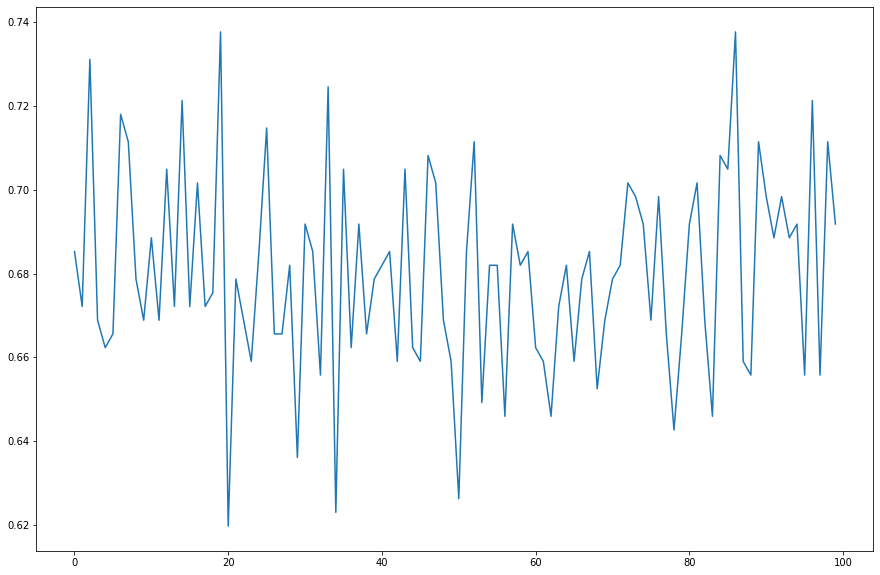

In [63]:
Predict_Score_SVM_OneHotEncoder(last_data)

## Chuẩn hóa Min Max

In [64]:
data = OneHotEncoder_Label()
data = SolvingOutliers(data,1) 
last_data = ChangeRawData(data,1)
columns_get = ['Price_log','Discount Rate','Review_log']
last_data_minmax=pd.DataFrame(min_max.fit_transform(last_data[['Price_log','Discount Rate','Review_log']]),columns=columns_get)

last_data['Price_log'] = last_data_minmax['Price_log']
last_data['Discount Rate'] = last_data_minmax['Discount Rate']
last_data['Review_log'] = last_data_minmax['Review_log']
arr_drop_new = ['Price','Total Review','Rating Average','index']
last_data.drop(arr_drop_new, inplace=True, axis=1)

(0.6588852459016394, 0.7147540983606557, 0.5901639344262295)

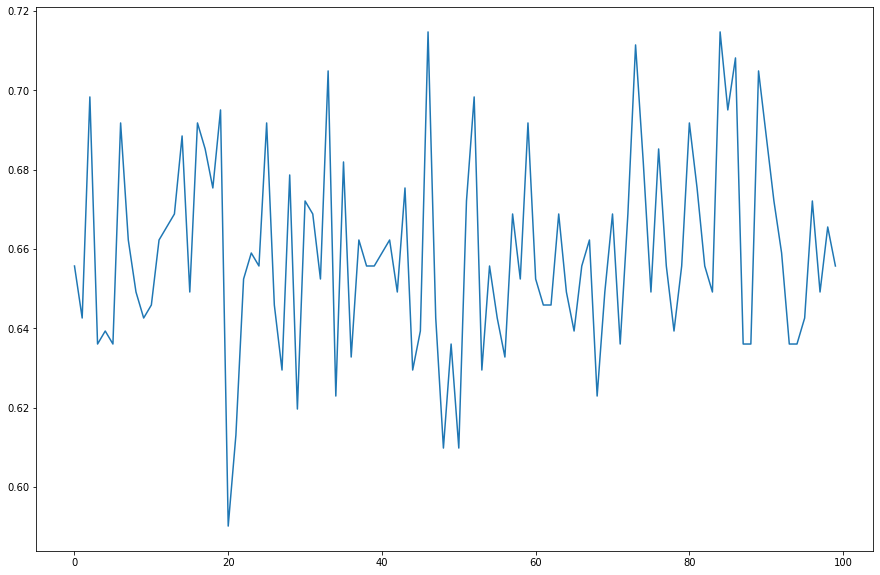

In [65]:
Predict_Score_SVM_OneHotEncoder(last_data)

In [66]:
data = OneHotEncoder_Label()
data = SolvingOutliers(data)  # không xử lý ngoại lệ để áp dụng chuẩn hóa 
last_data = ChangeRawData(data,1)
last_data_robust_scaler=pd.DataFrame(r_scaler.fit_transform(last_data[['Price_log','Discount Rate','Review_log']]),columns=columns_get)

last_data['Price_log'] = last_data_robust_scaler['Price_log']
last_data['Discount Rate'] = last_data_robust_scaler['Discount Rate']
last_data['Review_log'] = last_data_robust_scaler['Review_log']
arr_drop_new = ['Price','Total Review','Rating Average','index']
last_data.drop(arr_drop_new, inplace=True, axis=1)

(0.6824590163934426, 0.740983606557377, 0.6196721311475409)

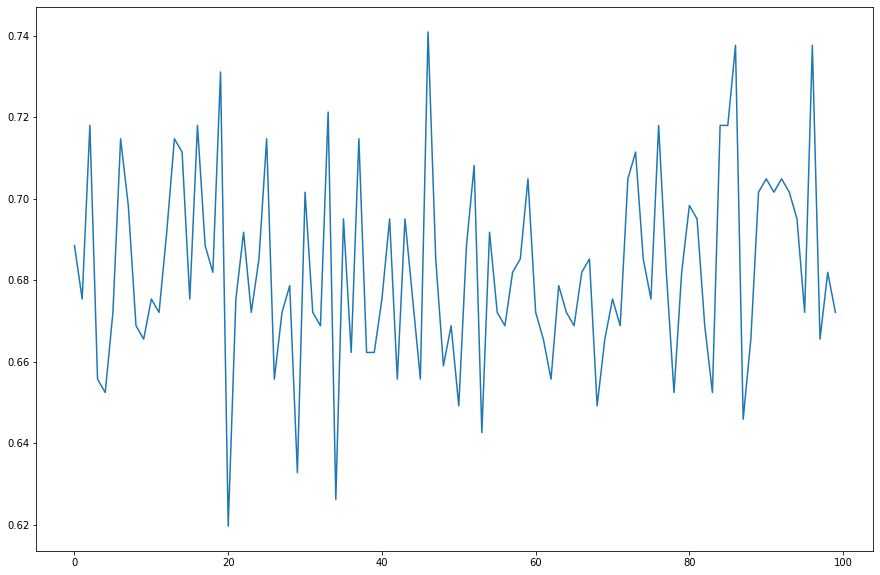

In [67]:
Predict_Score_SVM_OneHotEncoder(last_data)